In [ ]:
import warnings
warnings.filterwarnings('ignore') #para ignorar erros
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #biblitoca para gráficos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix #métricas de classificação

#Importa os métodos de classificação

# importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import SVM
from sklearn.svm import SVC
#import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# no null values overall
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


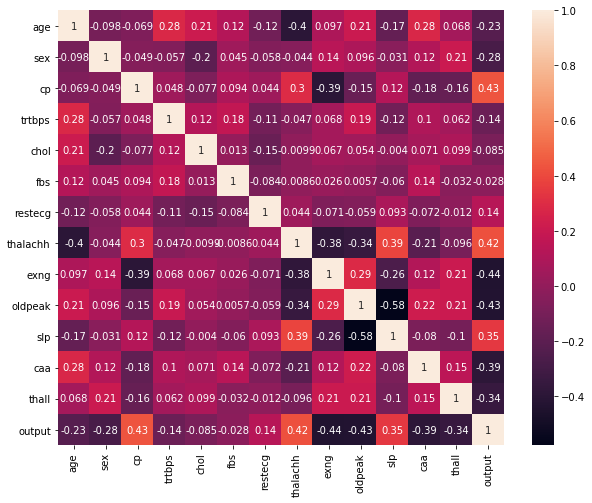

In [ ]:
#gráfico de correlação entre as variáveis
plt.figure(figsize = (10,8))
sns.heatmap(df_heart.corr(),annot=True)

In [ ]:
#conta as diferentes classes
print("Contagem da variável output")
df_heart['output'].value_counts()

Contagem da variável output


1    165
0    138
Name: output, dtype: int64

In [ ]:
print("Contagem da variável rest_ecg")
df_heart['cp'].value_counts()

Contagem da variável rest_ecg


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

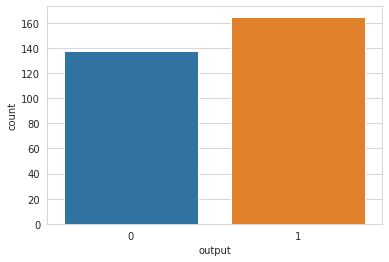

In [ ]:
#exibe gráfico com os plots
sns.set_style('whitegrid')
sns.countplot(df_heart['output'])

In [ ]:
X = df_heart.drop('output', axis = 1)
y = df_heart['output']

In [ ]:
#separa os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train)

     age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
124   39    0   2      94   199    0  ...       179     0      0.0    2    0      2
72    29    1   1     130   204    0  ...       202     0      0.0    2    0      2
15    50    0   2     120   219    0  ...       158     0      1.6    1    0      2
10    54    1   0     140   239    0  ...       160     0      1.2    2    0      2
163   38    1   2     138   175    0  ...       173     0      0.0    2    4      2
..   ...  ...  ..     ...   ...  ...  ...       ...   ...      ...  ...  ...    ...
188   50    1   2     140   233    0  ...       163     0      0.6    1    1      3
71    51    1   2      94   227    0  ...       154     1      0.0    2    1      3
106   69    1   3     160   234    1  ...       131     0      0.1    1    1      2
270   46    1   0     120   249    0  ...       144     0      0.8    2    0      3
102   63    0   1     140   195    0  ...       179     0      0.0    2    2

In [ ]:
#transforma os dados na mesma escala - normaliza os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train)

[[-1.67339636 -1.39443338  0.95280942 ...  0.955317   -0.67629057
  -0.54888242]
 [-2.76362385  0.71713717 -0.01367669 ...  0.955317   -0.67629057
  -0.54888242]
 [-0.47414611 -1.39443338  0.95280942 ... -0.67796691 -0.67629057
  -0.54888242]
 ...
 [ 1.59728613  0.71713717  1.91929553 ... -0.67796691  0.37792709
  -0.54888242]
 [-0.91023711  0.71713717 -0.9801628  ...  0.955317   -0.67629057
   1.13753893]
 [ 0.94314964 -1.39443338 -0.01367669 ...  0.955317    1.43214475
  -0.54888242]]


In [ ]:
#realiza o treinamento no modelo RandomForest
ran_fc = RandomForestClassifier()
ran_fc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#realiza a predição ou seja o teste
rfc_pred = ran_fc.predict(X_test)

In [ ]:
print(rfc_pred)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1]


In [ ]:
print("Resultado do Modelo RandomForest")
print(classification_report(y_test, rfc_pred)) #realiza a comparação entre o real e o predito

Resultado do Modelo RandomForest
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Resultado da matriz de Confusão do RandomForest


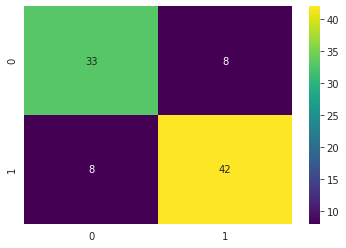

In [ ]:
print("Resultado da matriz de Confusão do RandomForest")
confu_mat = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#realiza a predição
knn_pred = knn_model.predict(X_test)

Resultado do Modelo KNN
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.87      0.90      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91

Resultado da matriz de Confusão do KNN


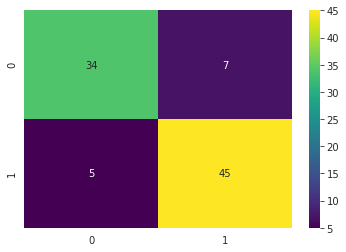

In [ ]:
print("Resultado do Modelo KNN")
print(classification_report(y_test, knn_pred))
print("Resultado da matriz de Confusão do KNN")
confu_mat = confusion_matrix(y_test, knn_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo Gaussiano
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

#realiza a predição
gaus_pred = gaus_model.predict(X_test)


Resultado do Modelo Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

Resultado da matriz de Naive Bayes


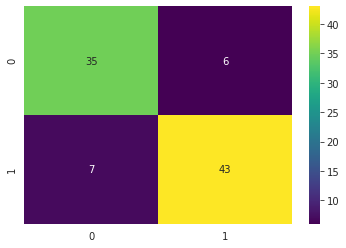

In [ ]:
print("Resultado do Modelo Naive Bayes")
print(classification_report(y_test, gaus_pred))
print("Resultado da matriz de Naive Bayes")
confu_mat = confusion_matrix(y_test, gaus_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo SVM
svm_model = SVC() 
svm_model.fit(X_train, y_train)

#realiza a predição
svm_pred = svm_model.predict(X_test)

Resultado do Modelo SVM
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.82      0.90      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

Resultado da matriz de SVM


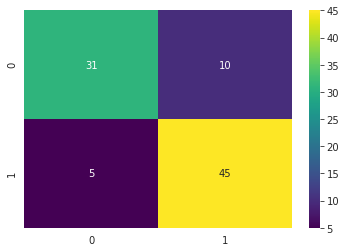

In [ ]:
print("Resultado do Modelo SVM")
print(classification_report(y_test, svm_pred))
print("Resultado da matriz de SVM")
confu_mat = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo Tree
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

#realiza a predição
tree_pred = tree_model.predict(X_test)


Resultado do Modelo Tree
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        41
           1       0.82      0.72      0.77        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

Resultado da matriz de Tree


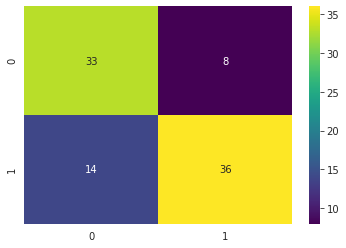

In [ ]:
print("Resultado do Modelo Tree")
print(classification_report(y_test, tree_pred))
print("Resultado da matriz de Tree")
confu_mat = confusion_matrix(y_test, tree_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo Rede Neural Multi Layer Perceptron
mlp_model = MLPClassifier(random_state=1, max_iter=300) 
mlp_model.fit(X_train, y_train)

#realiza a predição
mlp_pred = mlp_model.predict(X_test)

Resultado do Modelo Rede Neural Multi Layer Perceptron
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        41
           1       0.81      0.92      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

Resultado da matriz Rede Neural Multi Layer Perceptron


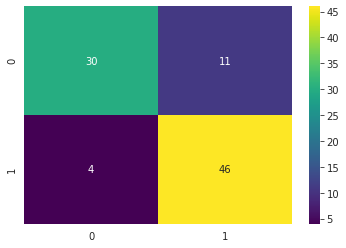

In [ ]:
print("Resultado do Modelo Rede Neural Multi Layer Perceptron")
print(classification_report(y_test, mlp_pred))
print("Resultado da matriz Rede Neural Multi Layer Perceptron")
confu_mat = confusion_matrix(y_test, mlp_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')